In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import datetime
import time

from tensorflow import keras
from tensorflow.keras import Model,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout, Add, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import datasets, layers, models, losses
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
image_shape=(28,28,1)

In [ ]:
AlexNet_model = Sequential()
#1st conv layer
AlexNet_model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())
# Max Pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Conv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())
# Max pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='same'))

#3rd Conv layer
AlexNet_model.add(Conv2D(filters=384, kernel_size=(5,5), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#4th сonv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#5th Conv layer
AlexNet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet_model.add(Activation('relu'))
AlexNet_model.add(BatchNormalization())

#Max pooling layer
AlexNet_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Flatten layer
AlexNet_model.add(Flatten())
#6th fully connected layer
AlexNet_model.add(Dense(4096, input_shape=image_shape, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#7th fully connected layer
AlexNet_model.add(Dense(4096, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#8th fully connected layer
AlexNet_model.add(Dense(1000, activation='relu'))
AlexNet_model.add(Dropout(0.4))

#Output layer
AlexNet_model.add(Dense(10, activation='softmax'))

In [ ]:
AlexNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 96)          11712     
                                                                 
 activation (Activation)     (None, 7, 7, 96)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)         0

In [ ]:
AlexNet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
start_time = time.time()
AlexNet = AlexNet_model.fit(x_train, y_train, batch_size=256,
                    epochs=5, validation_data=(x_test, y_test),callbacks=[tensorboard_callback],verbose=1)

end_time = time.time()
alex_run_time = end_time - start_time
print('Run Time is: ',alex_run_time,'seconds')

Epoch 1/5
235/235 [==============================] - 1810s 8s/step - loss: 0.5791 - accuracy: 0.7841 - val_loss: 2.2454 - val_accuracy: 0.3389
Epoch 2/5
235/235 [==============================] - 1814s 8s/step - loss: 0.3722 - accuracy: 0.8657 - val_loss: 0.5006 - val_accuracy: 0.8188
Epoch 3/5
235/235 [==============================] - 2116s 9s/step - loss: 0.3296 - accuracy: 0.8815 - val_loss: 0.3646 - val_accuracy: 0.8620
Epoch 4/5
235/235 [==============================] - 1902s 8s/step - loss: 0.3049 - accuracy: 0.8911 - val_loss: 0.3995 - val_accuracy: 0.8679
Epoch 5/5
235/235 [==============================] - 2169s 9s/step - loss: 0.2814 - accuracy: 0.8990 - val_loss: 0.4049 - val_accuracy: 0.8597
Run Time is:  9812.070379257202 seconds


In [ ]:
AlexNet_model.evaluate(x_test,y=y_test)

313/313 [==============================] - 36s 115ms/step - loss: 0.4049 - accuracy: 0.8597


[0.4049118161201477, 0.8597000241279602]

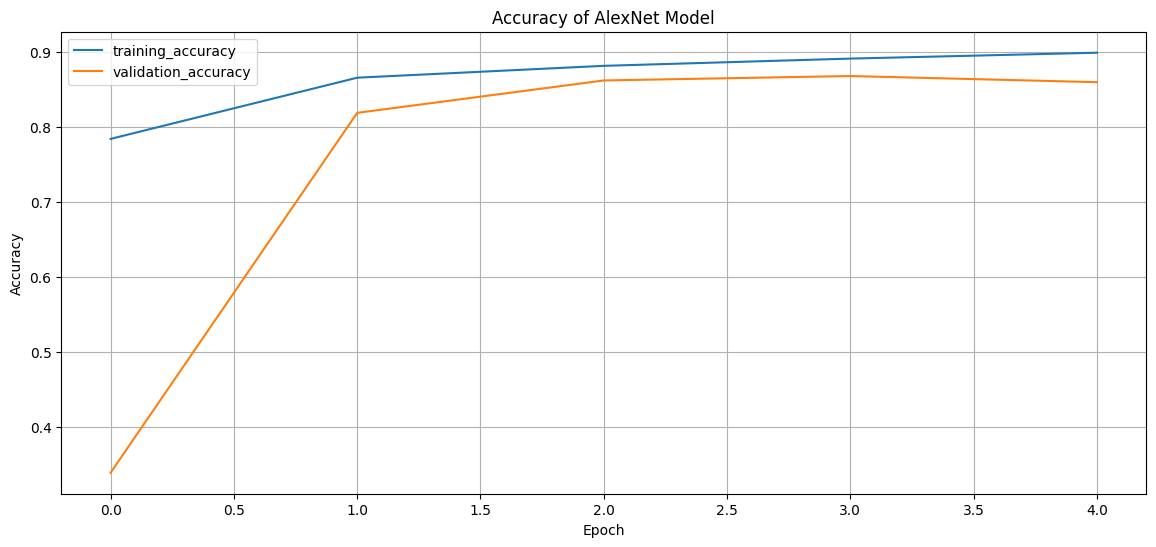

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(AlexNet.history['accuracy'])
plt.plot(AlexNet.history['val_accuracy'])
plt.title('Accuracy of AlexNet Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
plt.show()

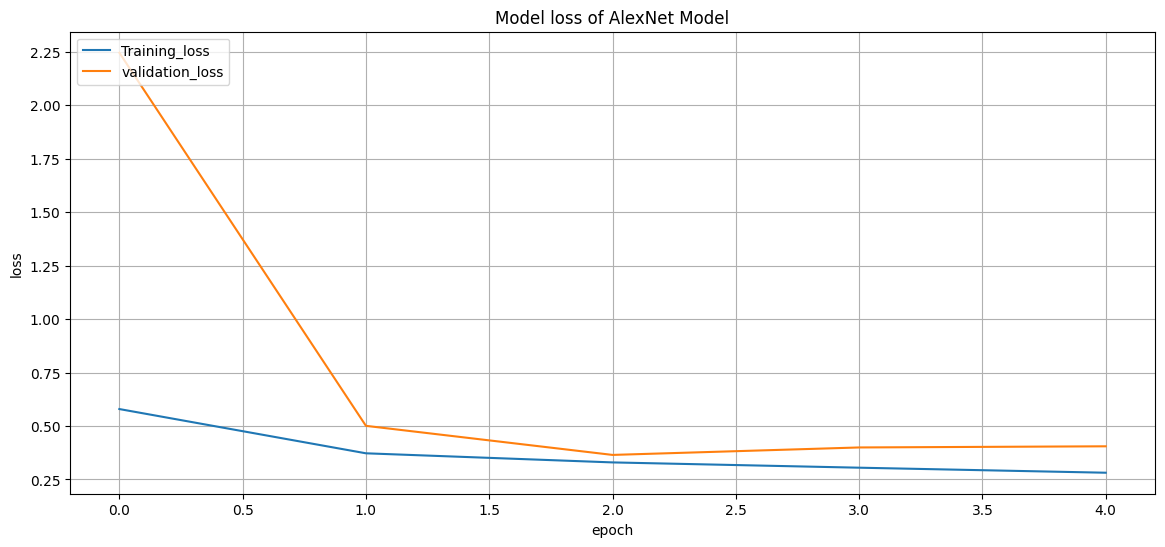

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(AlexNet.history['loss'])
plt.plot(AlexNet.history['val_loss'])
plt.title('Model loss of AlexNet Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training_loss', 'validation_loss'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import (Input)

In [ ]:
from keras.layers import concatenate

img_a_in = Input(shape=x_train.shape[1:], name="ImageA_Input")
img_b_in = Input(shape=x_train.shape[1:], name="ImageB_Input")

img_a_feat = AlexNet_model(img_a_in)
img_b_feat = AlexNet_model(img_b_in)

combined_features = concatenate([img_a_feat, img_b_feat], name="merge_features")
combined_features = Dense(64, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(16, activation="linear")(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation("relu")(combined_features)
combined_features = Dense(1, activation="sigmoid")(combined_features)
similarity_model = Model(inputs=[img_a_in, img_b_in], outputs=[combined_features], name="Similarity_Model")

similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10)           26505410    ['ImageA_Input[0][0]',           
                                                                  'ImageB_Input[0][0]']           
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['sequential[4][0]

In [ ]:
similarity_model.compile(optimizer="adam", loss="binary_crossentropy",
                         metrics=["mae"])

In [ ]:
def gen_random_batch(in_groups, batch_halfsize=8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size=batch_halfsize)
        out_img_a += [in_groups[c_idx]
                      [np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]

        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]

    return np.stack(out_img_a, 0), np.stack(out_img_b, 0), np.stack(out_score, 0)

In [ ]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]

1/1 [==============================] - 1s 509ms/step


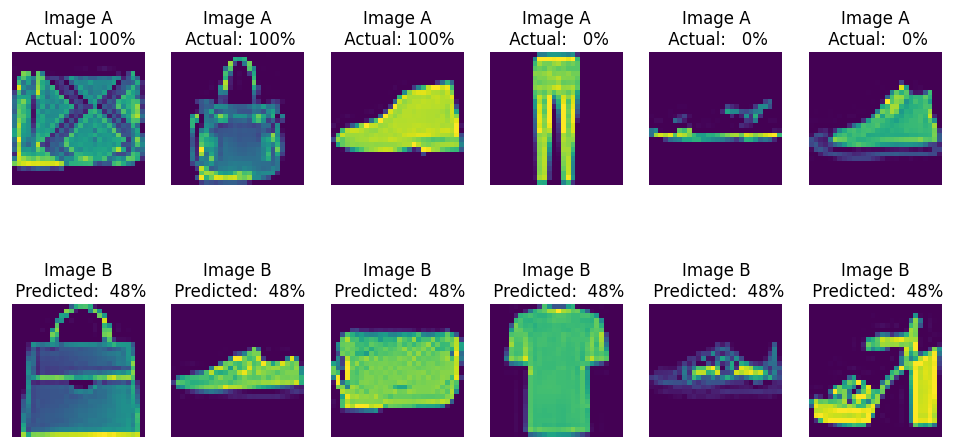

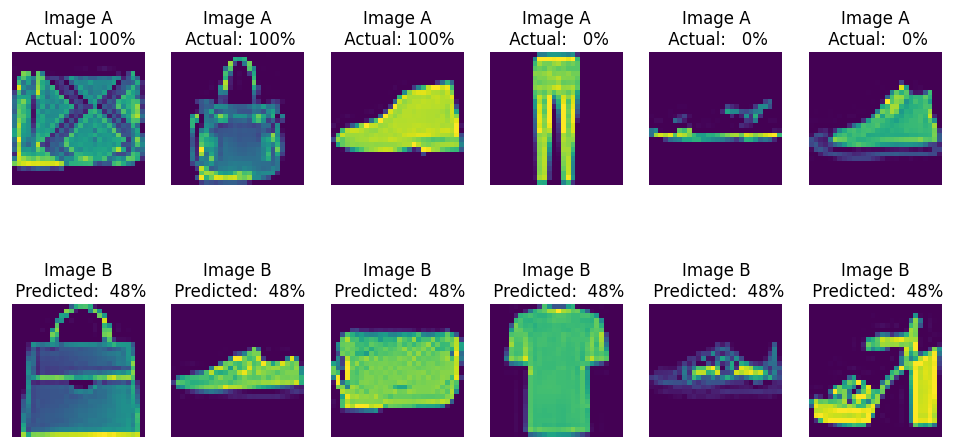

In [ ]:
def show_model_output(nb_examples=3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize=(12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim,
                                              m_axs.T):
        ax1.imshow(c_a[:, :, 0])
        ax1.set_title("Image A\n Actual: %3.0f%%" % (100 * c_d))
        ax1.axis("off")
        ax2.imshow(c_b[:, :, 0])
        ax2.set_title("Image B\n Predicted: %3.0f%%" % (100 * p_d))
        ax2.axis("off")
    return fig

show_model_output()

In [ ]:
def siam_gen(in_groups, batch_size=32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size // 2)
        yield [pv_a, pv_b], pv_sim


valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit_generator(siam_gen(train_groups),
                                              steps_per_epoch=200,
                                              validation_data=([valid_a, valid_b],
                                                               valid_sim),
                                              epochs=5,
                                              verbose=True)

  loss_history = similarity_model.fit_generator(siam_gen(train_groups),


Epoch 1/5
200/200 [==============================] - 1023s 5s/step - loss: 0.7010 - mae: 0.4980 - val_loss: 0.6930 - val_mae: 0.4991
Epoch 2/5
200/200 [==============================] - 620s 3s/step - loss: 0.6974 - mae: 0.5005 - val_loss: 0.6944 - val_mae: 0.5000
Epoch 3/5
200/200 [==============================] - 665s 3s/step - loss: 0.6938 - mae: 0.5000 - val_loss: 0.6956 - val_mae: 0.5000
Epoch 4/5
200/200 [==============================] - 581s 3s/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6955 - val_mae: 0.5000
Epoch 5/5
200/200 [==============================] - 546s 3s/step - loss: 0.6931 - mae: 0.5000 - val_loss: 0.6935 - val_mae: 0.5000


1/1 [==============================] - 0s 400ms/step


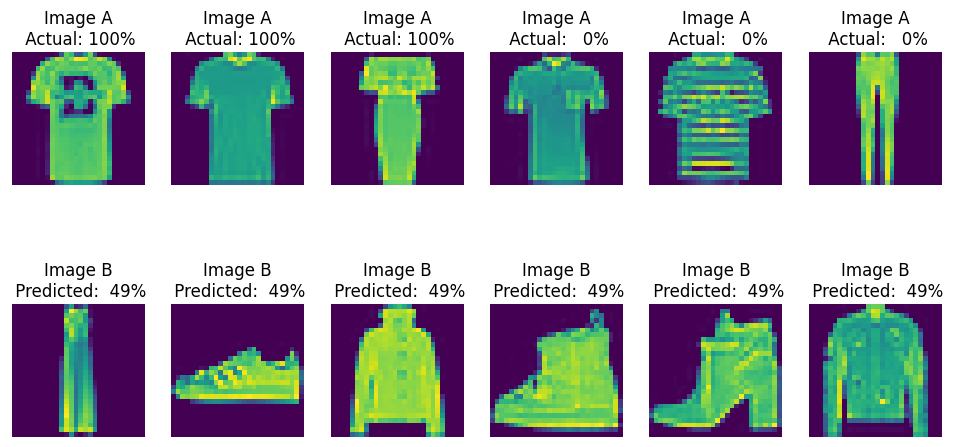

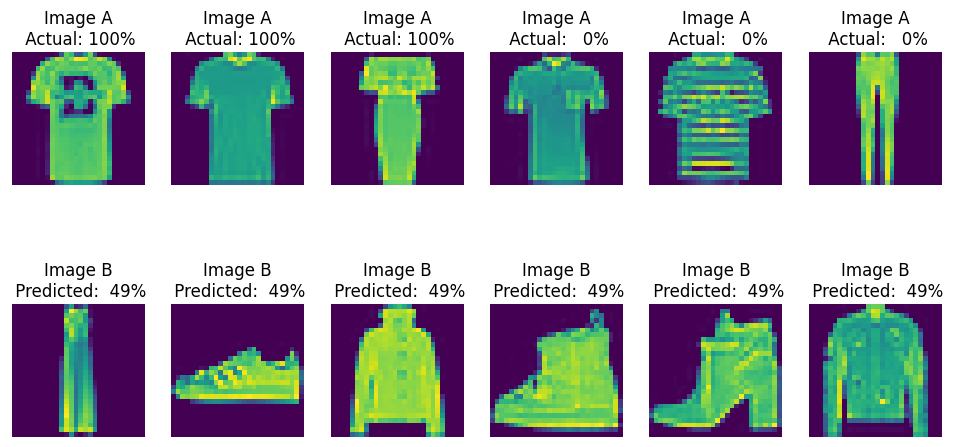

In [ ]:
show_model_output()

In [ ]:
from sklearn.manifold import TSNE
x_test_features = AlexNet_model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 6s 75ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.030s...
[t-SNE] Computed neighbors for 10000 samples in 0.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.721237
[t-SNE] KL divergence aft

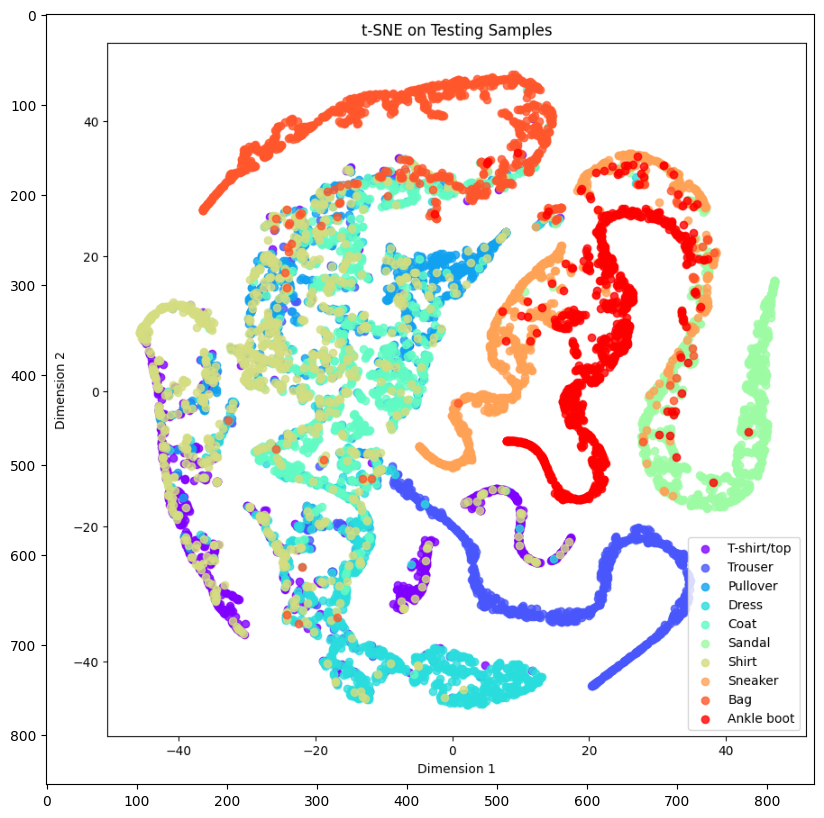

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

obj_categories = [
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes_dist.png')
plt.show(block=False)